# Starbucks
* Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world's largest coffeehouse chain, Starbucks is seen to be the main representation of the United States' second wave of coffee culture. As of September 2020, the company had 32,660 stores in 83 countries, including 16,637 company operated stores and 16,023 licensed stores. Of these 32,660 stores, 18,354 were in the United States, Canada, and Latin America.

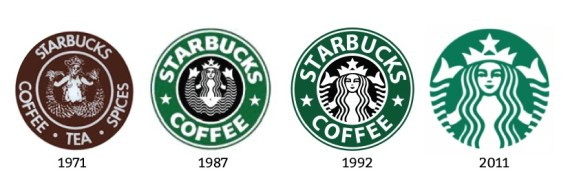

In [1]:
# Load image from local storage
# This library is to create displays
from IPython.display import Image

Image(filename="starbuckslogos-1.jpg", width=700, height=200)

In [2]:
%load_ext lab_black

In [3]:
# This library is to work with Data Frames
import pandas as pd

# This library is to work with vectors
import numpy as np

# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some plotting parameters
from matplotlib import rcParams

# To supplies classes for manipulating dates and times
import datetime

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

import plotly.graph_objs as go

# Calling reporting functions from util_reporting
from util_reporting import (
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    boxplot_viz,
    histogram_multiple_viz,
    countplot_pointplot_viz,
    multiple_plot_viz,
    distplot_viz,
)

# Calling reporting functions from util_data_cleaning
from util_data_cleaning import (
    missing_data_finder,
)

# Calling feature engineering functions from util_feature_engineering
from util_feature_engineering import (
    calculating_zscore,
    creating_date_columns,
)


%matplotlib inline
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

# Setting a universal figure size<
rcParams["figure.figsize"] = 8, 6

## Dataset
The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed
* Here is the schema and explanation of each variable in the files:

### portfolio.json

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

### profile.json

* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

### transcript.json

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

### Uploading data sets:

In [4]:
# Transaction CSVs
transcript = pd.read_csv("transcript.csv")
profile = pd.read_csv("profile.csv")
portfolio = pd.read_csv("portfolio.csv")

### The First Looking to Data Set:
* I called `df_first_look` from `util_reporting.py`.
* This function returns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [5]:
df_first_look(transcript)

First 5 rows of dataframe:
--------------------------
                              person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  

Last 5 rows of dataframe:
--------------------------
                                   person        event              value  time
102768  b784cc0181ee49f59ffca05ab571872a  transaction   {'amount': 1.28}   288
102769  6c2504661149460d8a44d95e99ca3186 

In [6]:
df_first_look(profile)

First 5 rows of dataframe:
--------------------------
   gender  age                                id  became_member_on    income
0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

Last 5 rows of dataframe:
--------------------------
       gender  age                                id  became_member_on   income
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604  54000.0
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713  72000.0
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126  73000.0
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307  50000.0
16999      F   62  e4052622e5ba45a8b96b

In [7]:
df_first_look(portfolio)

First 5 rows of dataframe:
--------------------------
    reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   

      offer_type                                id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  

Last 5 rows of dataframe:
--------------------------
    reward                              channels  difficulty  duration  \
5       3  ['web', 'email', 'mobile', 'social']           7 

#### Observation:
* Transcripts and portfolio data sets contain integer and object types of data. Profile data set contain floot,integer and object types of data.
* Only Profile data sets contain null/missing values.


## Understanding Variables: Profile Data

In [8]:
profile.head(3)

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN


### Numerical Features:
### Age:

* Definition: Age of the customers

In [9]:
# To see count of rows and count of missing values of Age column:

print("Count of non-missing rows of Age column:", profile["age"].count())
print("Count of missing rows of Age column:", profile["age"].isnull().sum())

Count of non-missing rows of Age column: 17000
Count of missing rows of Age column: 0


* I called `df_descriptive_statistics` from `util_reporting.py`. This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [10]:
list_of_column_descriptive = ["age"]
df_descriptive_statistics(profile, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
                 age
count  17000.000000
mean      62.531412
std       26.738580
min       18.000000
25%       45.000000
50%       58.000000
75%       73.000000
max      118.000000

Mode values for column:
--------------------------
    age
0  118



* I called `boxplot_viz` from `util_reporting.py`. This function does;
    * This function visualizes a boxplot for a column.

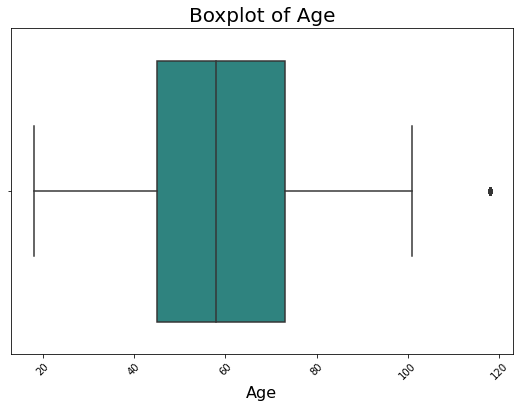

In [11]:
boxplot_viz(profile, "age", xlabel="Age", title="Boxplot of Age")

##### How to Read The Graph: 
* This graph shows description statistics of Age column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

* I called `calculating_zscore` from `util_feature_engineering.py`.
* This function does;
    * This function calculating z score for column list. 
    * We calculated z score for age and fare columns. We'll use fare at the below lines.

In [12]:
cols = ["age"]
profile = calculating_zscore(profile, cols, 2)

In [13]:
# Total outlier count
print(
    "Total outlier count:",
    profile[(profile["age_zscore"] > 2) | (profile["age_zscore"] < -2)].shape[0],
)

Total outlier count: 2175


##### Observation:
* Descriptive Statisctics: 
   * Median and mean values are close each other but mode is slightly bigger. Because of this situation distribution is negative skewed. 
   * Average customer age shows that most of customers are old. There are a lot of outliers that are more than their age bigger than 100. I think, increased avg age is because of these.
* Boxplot Graph and zscore Table:
    * There are 2175 outliers in the Age column. 

In [14]:
profile[(profile["age"] < 119) & (profile["age"] > 100)]

,gender,age,id,became_member_on,income,age_zscore,age_zscore_outlier
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,2.074539,outlier
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,2.074539,outlier
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,2.074539,outlier
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN,2.074539,outlier
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN,2.074539,outlier
...,...,...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN,2.074539,outlier
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN,2.074539,outlier
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN,2.074539,outlier
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN,2.074539,outlier


* There are 2180 outliers in dataset. Their gender raws and income raws are NaN. We can move customer age that bigger than 100 from dataset.

In [15]:
profile.drop(
    profile.index[(profile["age"] < 119) & (profile["age"] > 100)], inplace=True
)

In [16]:
(profile.isnull().sum())

gender                0
age                   0
id                    0
became_member_on      0
income                0
age_zscore            0
age_zscore_outlier    0
dtype: int64

### Income:
* Defination: Customer's income
* I called `df_descriptive_statistics` from `util_reporting.py`. This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [17]:
list_of_column_descriptive = ["income"]
df_descriptive_statistics(profile, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
               income
count   14820.000000
mean    65404.183536
std     21598.763284
min     30000.000000
25%     49000.000000
50%     64000.000000
75%     80000.000000
max    120000.000000

Mode values for column:
--------------------------
     income
0  73000.0



* I called `boxplot_viz` from `util_reporting.py`. This function does;
    * This function visualizes a boxplot for a column.

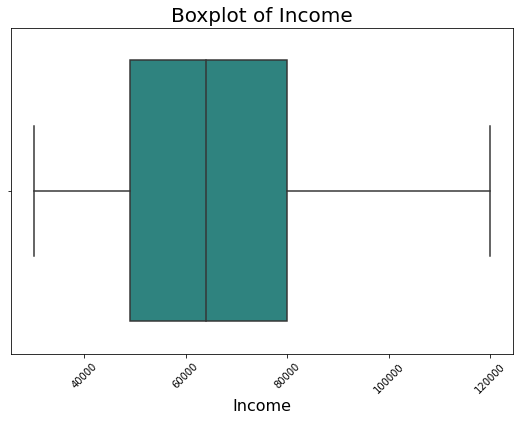

In [18]:
boxplot_viz(profile, "income", xlabel="Income", title="Boxplot of Income")

##### How to Read The Graph: 
* This graph shows description statistics of income column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

* I called `calculating_zscore` from `util_feature_engineering.py`.
* This function does;
    * This function calculating z score for column list. 
    * We calculated z score for age and fare columns. We'll use fare at the below lines.

In [19]:
cols = ["income"]
profile = calculating_zscore(profile, cols, 3)

In [20]:
# Total outlier count
print(
    "Total outlier count:",
    profile[(profile["income_zscore"] > 3) | (profile["income_zscore"] < -3)].shape[0],
)

Total outlier count: 0


##### Observation:
* Descriptive Statisctics: 
   * Median and mean values are so close each other but mode is slightly bigger. Because of this situation distribution is left skewed (negative skew). 
   * There are no big differences between min income and mean income. 
* Boxplot Graph and zscore Table:
    * There are no  outliers in the income column. 

### Time Series Features:
### Became_member_on:
* Defination: Date when customer created an app account.
* Format: (int)

In [21]:
profile["became_member_on"].head(3)

1    20170715
3    20170509
5    20180426
Name: became_member_on, dtype: int64

In [22]:
print(profile["became_member_on"].dtypes)

int64


* To convert integer became_member_on column to datetime:

In [23]:
profile["became_member_on"] = pd.to_datetime(
    profile["became_member_on"], format="%Y%m%d"
)
print(profile["became_member_on"].dtypes)

datetime64[ns]


* To see separetly year, month and days of week I created new columns as below: 

In [24]:
profile["year"] = profile["became_member_on"].dt.year
profile["month"] = profile["became_member_on"].dt.month
profile["day"] = profile["became_member_on"].dt.day_name()

In [25]:
profile.head()

,gender,age,id,became_member_on,income,age_zscore,age_zscore_outlier,income_zscore,income_zscore_outlier,year,month,day
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,-0.281677,non-outlier,2.157410,non-outlier,2017,7,Saturday
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,0.466328,non-outlier,1.601804,non-outlier,2017,5,Tuesday
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0.204527,non-outlier,0.212789,non-outlier,2018,4,Thursday
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0.092326,non-outlier,-0.574320,non-outlier,2018,2,Friday
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,-0.169476,non-outlier,-0.666921,non-outlier,2017,11,Saturday


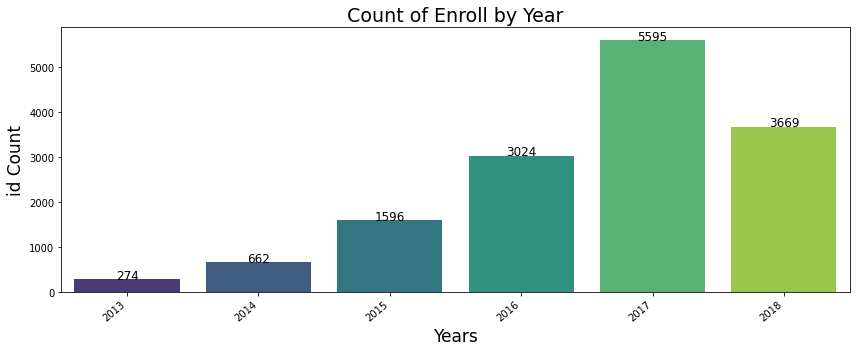

In [60]:
countplot_viz(
    profile,
    "year",
    "Years",
    "id Count",
    "Count of Enroll by Years",
    palette="viridis",
)

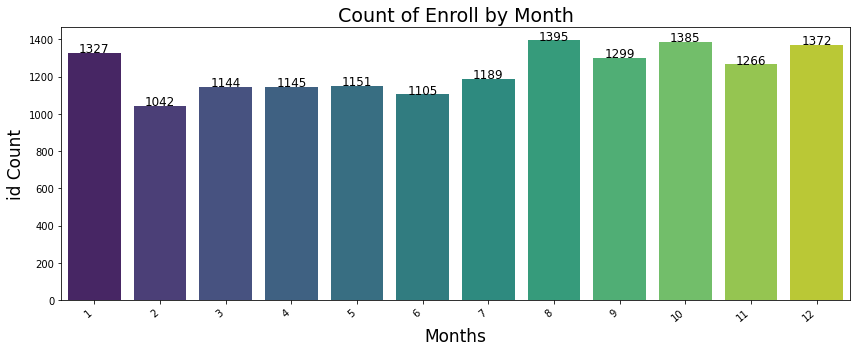

In [61]:
countplot_viz(
    profile,
    "month",
    "Months",
    "id Count",
    "Count of Enroll by Months",
    palette="viridis",
)

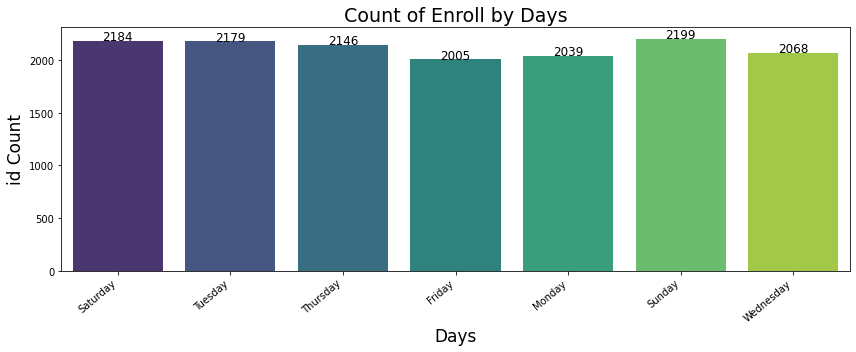

In [28]:
countplot_viz(
    profile,
    "day",
    "Days",
    "id Count",
    "Count of Enroll by Days",
    palette="viridis",
)

#### How to Read The Graphs:
* This graph shows the count of enroll by year, month or days.
* x column shows year, month or days; y column shows id count.

##### Observation:
* At 2017 enroll count was increased. After year enroll count was decreased almost %35. 
* The most of enroll count belong to August, October and December. The least enroll count belong to February.  
* There is no big differences between day of week. The most of enroll count belong to Sunday. 

### Categorical Features:
#### Gender:
* Definition: Gender of the customer (note some entries contain 'O' for other rather than M or F)
* Categories & Labels: F, M, O

In [29]:
profile.gender.value_counts()

M    8484
F    6124
O     212
Name: gender, dtype: int64

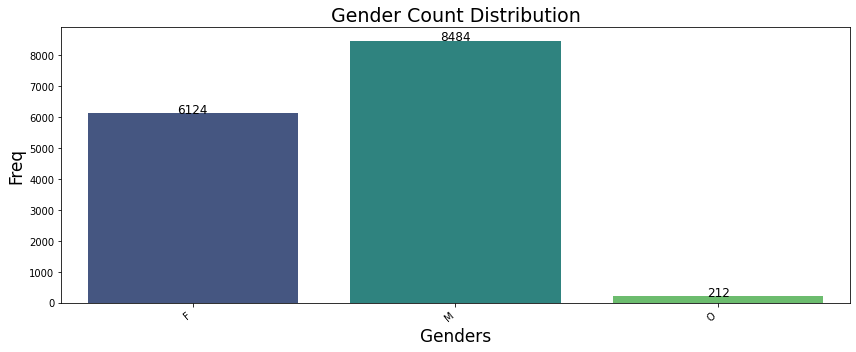

In [30]:
countplot_viz(
    profile,
    "gender",
    "Genders",
    "Freq",
    "Gender Count Distribution",
    palette="viridis",
)

#### How to Read The Graph:
* This graph shows the count of genders.
* x column shows types, y column shows gender count distribution.

#### Observation:
* Count of male customer more than count of female customers. Some customer didn't want to give infromation about their gender. 

## Bivariate Relationships:
### income & gender:
* I called `distplot_viz` from `util_reporting.py`. This function does;
    * Gets a Python Pandas dataframe and visualize displot by a column's conditions.
    * It shows density of column.

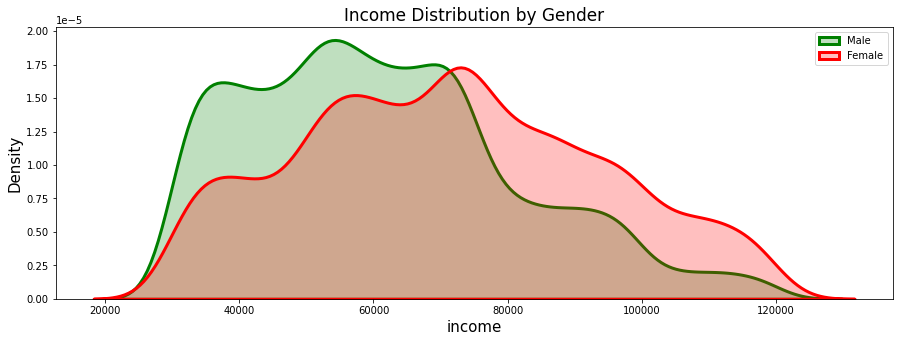

In [34]:
distplot_viz(
    profile,
    "income",
    "gender",
    "M",
    "F",
    "Male",
    "Female",
    "Income Distribution by Gender",
    color1="green",
    color2="red",
)

#### How to Read The Graph:
* This graph shows distribution of income column by gender column.
    * x column shows distribution of income, y column shows density.

#### Observation: 
* Density axis is extensive for both genders. All genders are included in all income categories. 
* Density axis shows womens earn money more than male.  

### age & gender:

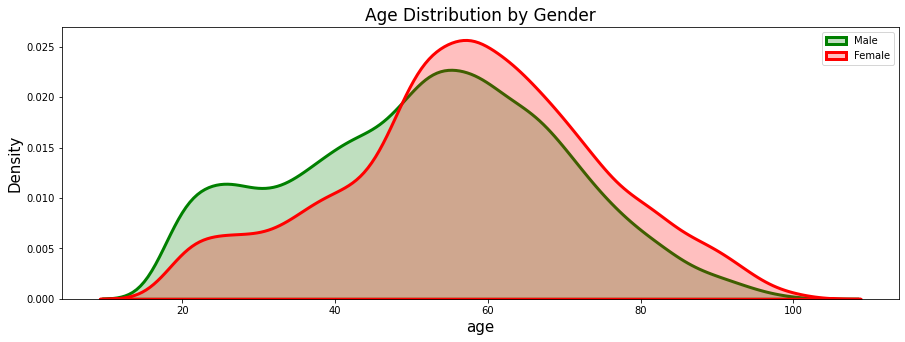

In [35]:
distplot_viz(
    profile,
    "age",
    "gender",
    "M",
    "F",
    "Male",
    "Female",
    "Age Distribution by Gender",
    color1="green",
    color2="red",
)

#### How to Read The Graph:
* This graph shows distribution of age column by gender column.
    * x column shows distribution of age, y column shows density.

#### Observation: 
* Density axis is extensive for both genders. All genders are included in all age categories. 
* Most of customer for both genders are between 50-60 years old.   

## Multivariate Relationships:

<AxesSubplot:xlabel='age', ylabel='income'>

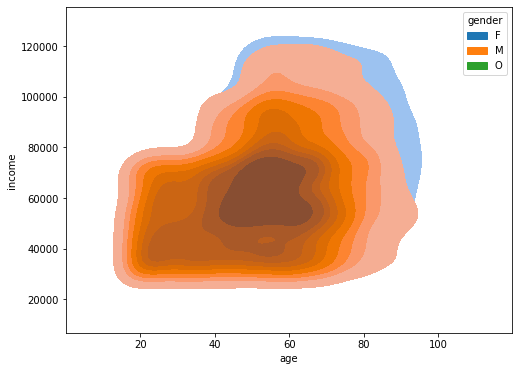

In [51]:
sns.kdeplot(
    data=profile,
    x="age",
    y="income",
    hue="gender",
    fill=True,
)

#### How to Read The Graph:
* This graph shows density of age and income by gender column.
    * x column shows distribution of age, y column shows distribution of income.

#### Observation: 
* here are density at same age and income for both genders. 

## Understanding Variables: Transcript Data

In [53]:
transcript.head(3)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


### Categorical Features:
#### Event:
* Definition: record description (ie transaction, offer received, offer viewed, etc.)
* Categories & Labels: transaction, offer received, offer viewed, offer completed

In [58]:
transcript["event"].value_counts()

transaction        48277
offer received     25319
offer viewed       19644
offer completed     9533
Name: event, dtype: int64

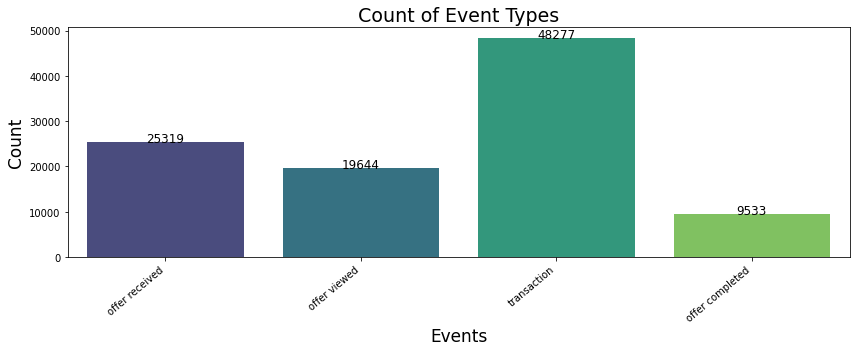

In [62]:
countplot_viz(
    transcript,
    "event",
    "Events",
    "Count",
    "Count of Event Types",
    palette="viridis",
)

#### How to Read The Graph:
* This graph shows the count of events.
* x column shows types, y column shows event count distribution.

#### Observation:
* 